# Insurance Premium  Prediction

## Load packages and dataset

In [1]:
# Import packages related
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
# Load the dataset
df = pd.read_csv('..\InsurancePremiumsPrediction\insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Exploration

In [4]:
# Overview of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are 5 features columns, 2 numeical and 3 categorical. No null values indicated. Label column is charges, which is numerical.

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


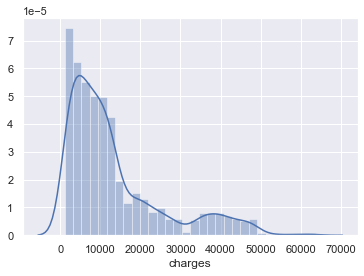

In [7]:
# Study label column
sns.distplot(df['charges'])

In [22]:
df['charges'].quantile(0.83)

23077.8702873

In [9]:
# Study categorical columns: sex
df['sex'].value_counts()


male      676
female    662
Name: sex, dtype: int64

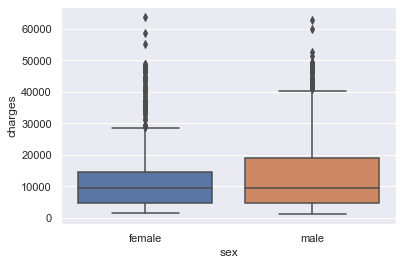

In [11]:
sns.boxplot(x='sex',y='charges',data=df)

The outliner of the charges could be a potential problem. Might consider seperate the premium prediction into two premium regions and calculate charges in each region.

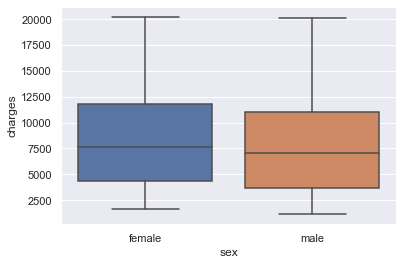

In [25]:
# df1 = df[df['charges']<=df['charges'].quantile(0.99)]
sns.boxplot(x='sex',y='charges',data=df[df['charges']<=df['charges'].quantile(0.8)])


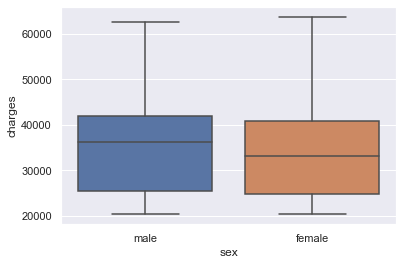

In [24]:
sns.boxplot(x='sex',y='charges',data=df[df['charges']>df['charges'].quantile(0.80)])

In [26]:
print(df[df['charges']>df['charges'].quantile(0.80)].shape)
print(df[df['charges']<=df['charges'].quantile(0.80)].shape)


(268, 7)
(1070, 7)


First model. Trying to predict the charges that are in the lower 80% quantile.

In [10]:
df['smoker'].value_counts()


no     1064
yes     274
Name: smoker, dtype: int64

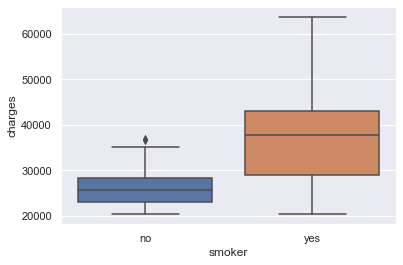

In [27]:
sns.boxplot(x='smoker',y='charges',data=df[df['charges']>df['charges'].quantile(0.80)])


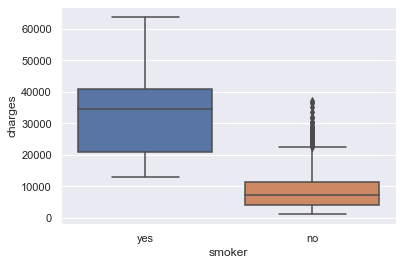

In [28]:
sns.boxplot(x='smoker',y='charges',data=df)


smoker is a good indicator of the charges as charges shows clearly different distribution regarding to different smoker categroies.

In [29]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

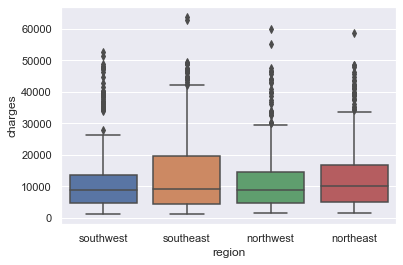

In [30]:
sns.boxplot(x='region',y='charges',data=df)


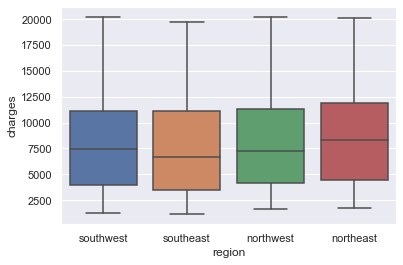

In [31]:
sns.boxplot(x='region',y='charges',data=df[df['charges']<=df['charges'].quantile(0.8)])

Northwest and southwest are very similiar.

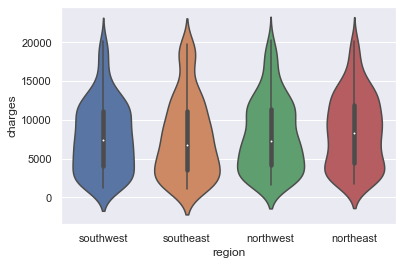

In [33]:
sns.violinplot(x='region',y='charges',data=df[df['charges']<=df['charges'].quantile(0.8)])


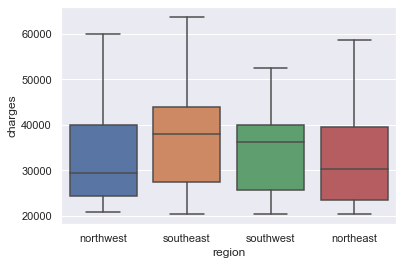

In [32]:
sns.boxplot(x='region',y='charges',data=df[df['charges']>df['charges'].quantile(0.8)])


Region is a good indicator for charges what is above the 80% quantile.

In [35]:
df2 = df.copy()
df2['regionCat'] = df2['region'].apply(lambda x: 'west' if (x == 'northwest' or x == 'southwest') else x)

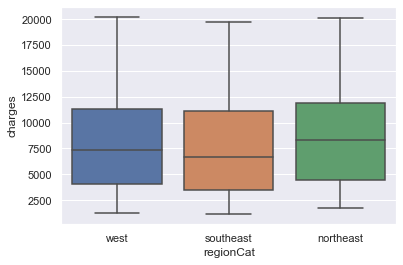

In [38]:
sns.boxplot(x='regionCat',y='charges',data=df2[df2['charges']<=df2['charges'].quantile(0.8)])


Combining the west regions is better.

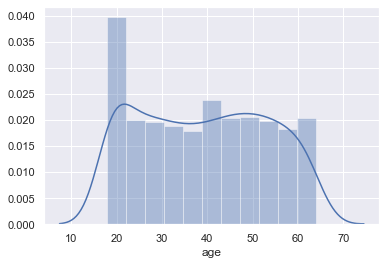

In [40]:
sns.distplot(df['age'])

In [41]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

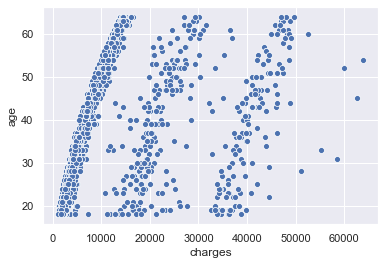

In [42]:
sns.scatterplot(x='charges',y='age',data=df)

In [60]:
# df2[df2['charges']<=df2['charges'].quantile(0.8)]
df['charges'].quantile(0.885)

32216.38385160005

In [49]:
df['charges'].quantile(0.74)

15819.016753999998

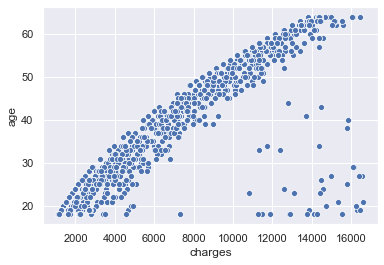

In [65]:
sns.scatterplot(x='charges',y='age',data=df[df['charges']<=df['charges'].quantile(0.75)])


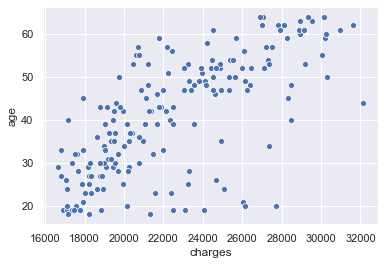

In [66]:
sns.scatterplot(x='charges',y='age',data=df[(df['charges']>df['charges'].quantile(0.75)) & (df['charges']<=df['charges'].quantile(0.885))])


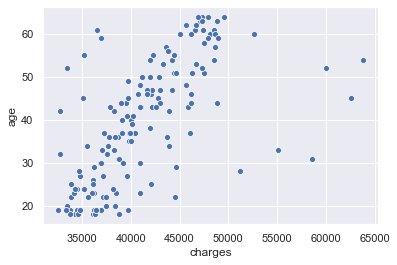

In [63]:
sns.scatterplot(x='charges',y='age',data=df[df['charges']>df['charges'].quantile(0.885)])

The age is a strong indicator of the charges. Consider divide the charges into three bins.0.75,0.885

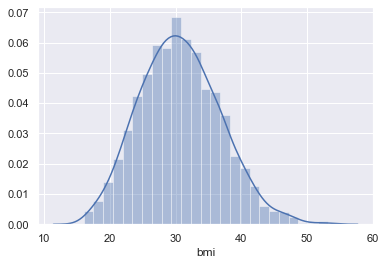

In [67]:
# BMI
sns.distplot(df['bmi'])

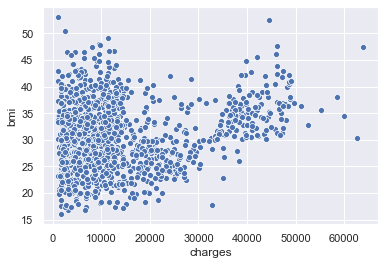

In [69]:
sns.scatterplot(x='charges',y='bmi',data=df)


In [73]:
df['charges'].quantile(0.75)

16639.912515

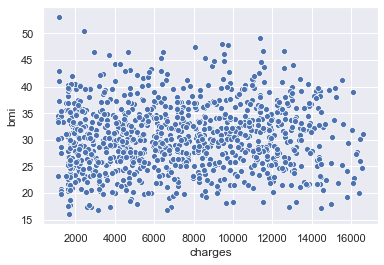

In [70]:
sns.scatterplot(x='charges',y='bmi',data=df[df['charges']<=df['charges'].quantile(0.75)])


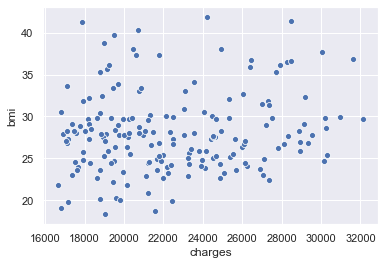

In [71]:
sns.scatterplot(x='charges',y='bmi',data=df[(df['charges']>df['charges'].quantile(0.75)) & (df['charges']<=df['charges'].quantile(0.885))])

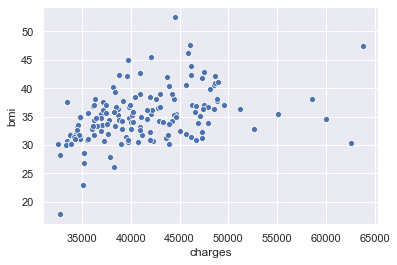

In [72]:
sns.scatterplot(x='charges',y='bmi',data=df[df['charges']>df['charges'].quantile(0.885)])


bmi is a good in dicator

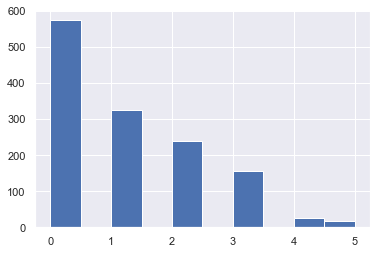

In [77]:
df['children'].hist()

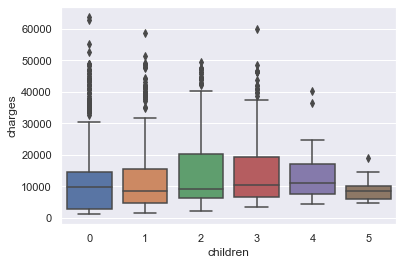

In [78]:
sns.boxplot(x='children',y='charges',data=df)

In [79]:
df1 = df[df['charges']<=df['charges'].quantile(0.75)]
df2 = df[(df['charges']>df['charges'].quantile(0.75)) & (df['charges']<=df['charges'].quantile(0.885))]
df3 = df[df['charges']>df['charges'].quantile(0.885)]

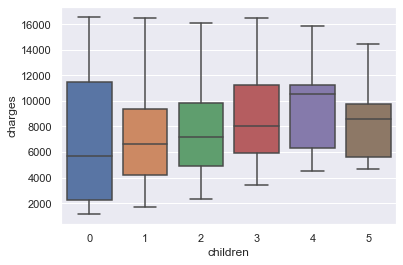

In [80]:
sns.boxplot(x='children',y='charges',data=df1)


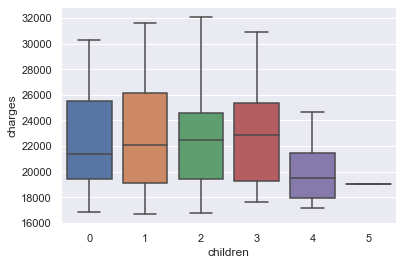

In [81]:
sns.boxplot(x='children',y='charges',data=df2)


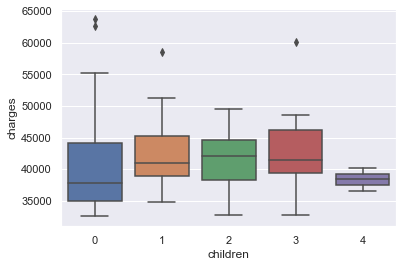

In [82]:
sns.boxplot(x='children',y='charges',data=df3)


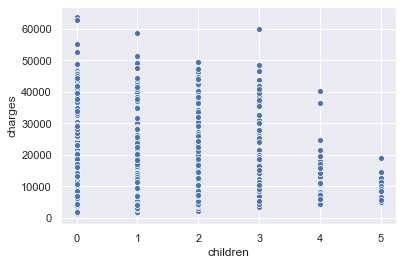

In [83]:
sns.scatterplot(x='children',y='charges',data=df)

In [84]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

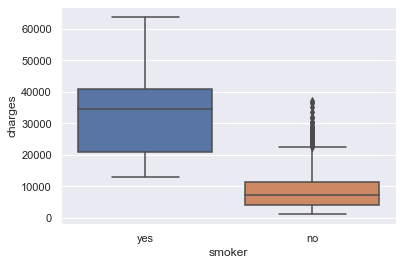

In [85]:
sns.boxplot(x='smoker',y='charges',data=df)

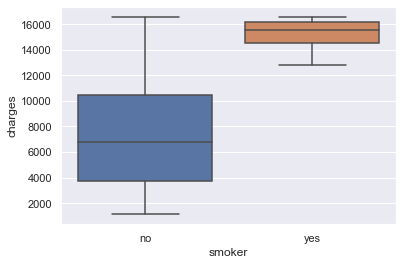

In [86]:
sns.boxplot(x='smoker',y='charges',data=df1)


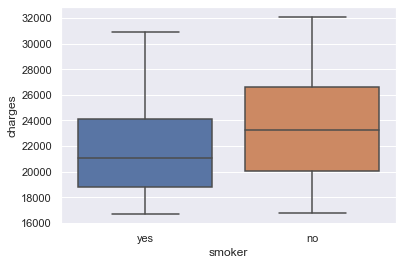

In [87]:
sns.boxplot(x='smoker',y='charges',data=df2)


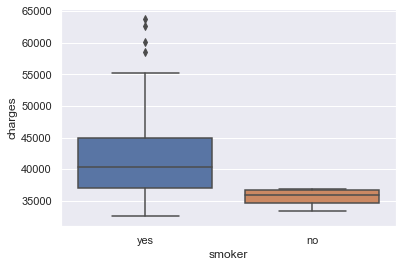

In [88]:
sns.boxplot(x='smoker',y='charges',data=df3)


In [89]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

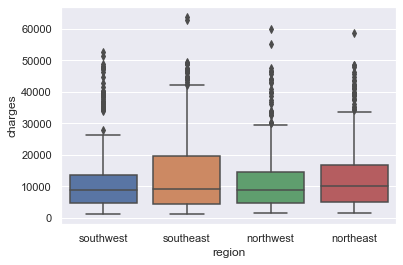

In [90]:
sns.boxplot(x='region',y='charges',data=df)


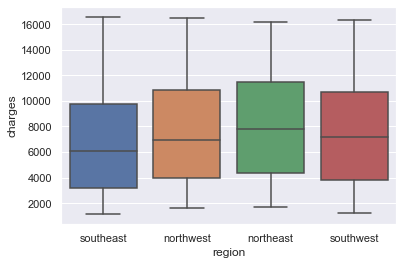

In [91]:
sns.boxplot(x='region',y='charges',data=df1)


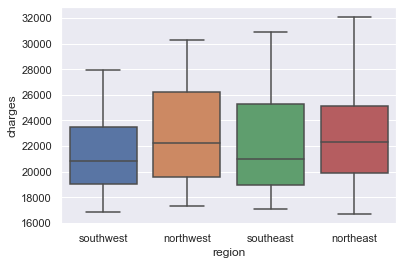

In [92]:
sns.boxplot(x='region',y='charges',data=df2)


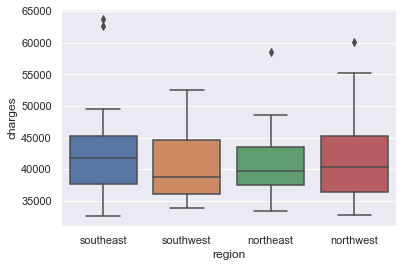

In [93]:
sns.boxplot(x='region',y='charges',data=df3)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

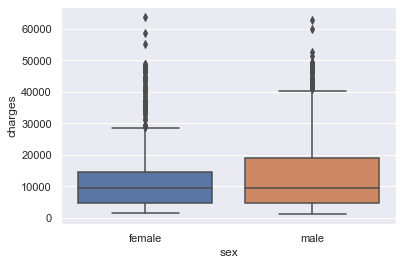

In [95]:
sns.boxplot(x='sex',y='charges',data=df)


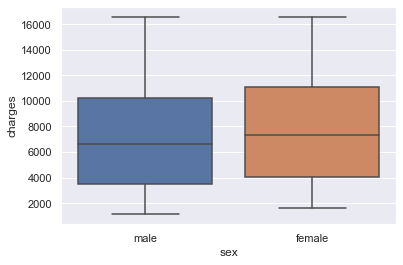

In [96]:
sns.boxplot(x='sex',y='charges',data=df1)


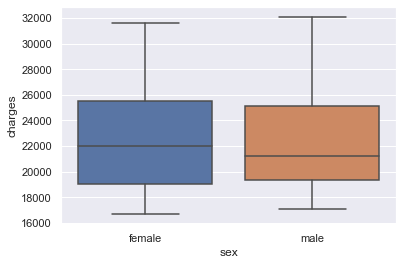

In [97]:
sns.boxplot(x='sex',y='charges',data=df2)


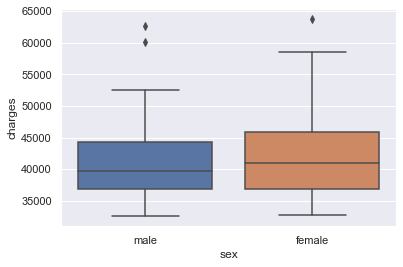

In [98]:
sns.boxplot(x='sex',y='charges',data=df3)


# Data Processing

## Categorize the charges into three groups

In [103]:
df1 = df[df['charges']<=df['charges'].quantile(0.75)]
df2 = df[(df['charges']>df['charges'].quantile(0.75)) & (df['charges']<=df['charges'].quantile(0.885))]
df3 = df[df['charges']>df['charges'].quantile(0.885)]

In [105]:
q1 = df['charges'].quantile(0.75)
q2 = df['charges'].quantile(0.885)
df['chargesCat'] = df['charges'].apply(lambda x: 0 if x <= q1 else (1 if x <= q2 else 2))

# Modeling: charges group classification

In [109]:
cat_cols = ['smoker', 'region','sex']
num_cols = ['age','bmi','children']
label_col =['chargesCat']


In [112]:
d_selected = df[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

In [107]:
df['chargesCat'].value_counts()

0    1003
1     181
2     154
Name: chargesCat, dtype: int64

There is a class imbalance problem. Need take methods to treat the imbalaned classes.

In [114]:
from imblearn.over_sampling import SMOTE, ADASYN
X = d_features_dummies.drop('chargesCat', axis=1)
y = d_features_dummies['chargesCat']

X_resampled, y_resampled = SMOTE().fit_resample(X, y)

y_resampled.value_counts()

1    1003
2    1003
0    1003
Name: chargesCat, dtype: int64

In [115]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)


# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report, precision_score, recall_score

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 90.03%
[[263  36   2]
 [ 37 260   1]
 [  5   9 290]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       301
           1       0.85      0.87      0.86       298
           2       0.99      0.95      0.97       304

    accuracy                           0.90       903
   macro avg       0.90      0.90      0.90       903
weighted avg       0.90      0.90      0.90       903



Overall accuracy of 90% and f1-score for all conditions are over 87%. 

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report, precision_score, recall_score

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 82.61%
[[252  47   2]
 [ 59 221  18]
 [  4  27 273]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       301
           1       0.75      0.74      0.75       298
           2       0.93      0.90      0.91       304

    accuracy                           0.83       903
   macro avg       0.83      0.83      0.83       903
weighted avg       0.83      0.83      0.83       903



Logistic regression is not as good.

In [119]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 81.84%
[[258  40   3]
 [ 64 203  31]
 [  5  21 278]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       301
           1       0.77      0.68      0.72       298
           2       0.89      0.91      0.90       304

    accuracy                           0.82       903
   macro avg       0.82      0.82      0.82       903
weighted avg       0.82      0.82      0.82       903



SVM regression is not as good.

In [120]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 77.30%
[[265  33   3]
 [ 95 168  35]
 [  3  36 265]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       301
           1       0.71      0.56      0.63       298
           2       0.87      0.87      0.87       304

    accuracy                           0.77       903
   macro avg       0.77      0.77      0.77       903
weighted avg       0.77      0.77      0.77       903



In [121]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(random_state=123, max_iter=300)
model.fit(X_train_scaled, y_train)

predictions = model.predict(X_test_scaled)
score = model.score(X_test_scaled, y_test)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 86.93%
[[261  37   3]
 [ 50 241   7]
 [  4  17 283]]
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       301
           1       0.82      0.81      0.81       298
           2       0.97      0.93      0.95       304

    accuracy                           0.87       903
   macro avg       0.87      0.87      0.87       903
weighted avg       0.87      0.87      0.87       903



Random Forest has the best results so far.

In [ ]:
X_resampled
# y_resampled
X
# y

In [125]:
X_resampled.iloc[:1338,:]

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,1,0,0,1,0
1,18,33.770,1,0,0,1,0,1
2,28,33.000,3,0,0,1,0,1
3,33,22.705,0,0,1,0,0,1
4,32,28.880,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,1
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,1,0,0
1336,21,25.800,0,0,0,0,1,0


In [124]:
X

,age,bmi,children,smoker_yes,region_northwest,region_southeast,region_southwest,sex_male
0,19,27.900,0,1,0,0,1,0
1,18,33.770,1,0,0,1,0,1
2,28,33.000,3,0,0,1,0,1
3,33,22.705,0,0,1,0,0,1
4,32,28.880,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,0,0,1
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,1,0,0
1336,21,25.800,0,0,0,0,1,0


In [127]:
y_resampled[:1338]

0       1
1       0
2       0
3       1
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: chargesCat, Length: 1338, dtype: int64

In [134]:
predictions.shape

(903,)

## Create regression model to predice the actual charges in each region.

In [137]:
cat_cols = ['smoker', 'region','sex']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df1[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

In [151]:
# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

In [153]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2 = ' + str(r2))
    print('Adjusted R^2 = ' + str(r2_adj))

In [154]:
print_metrics(y_test, predictions,8)

Mean Square Error = 2307186.828401633
Root Mean Square Error = 1518.9426679113446
Mean Absolute Error = 687.2125891665587
Median Absolute Error = 511.15002329842355
R^2 = 0.8680551060155333
Adjusted R^2 = 0.8649028389237542


R2 is 0.86, not too bad results.

### Test Ridge model

In [155]:
# Create and Train model
from sklearn.linear_model import Ridge
reg = Ridge().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)


Mean Square Error = 2306843.676296643
Root Mean Square Error = 1518.8297061542623
Mean Absolute Error = 688.2104402761693
Median Absolute Error = 513.51431499094
R^2 = 0.8680747304202656
Adjusted R^2 = 0.8649229321709204


### Test linearSVM

In [158]:
# Create and Train model
from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.5).fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)

Mean Square Error = 2306614.954527504
Root Mean Square Error = 1518.7544088915442
Mean Absolute Error = 687.1635790228504
Median Absolute Error = 509.9845685550008
R^2 = 0.8680878107088705
Adjusted R^2 = 0.864936324957888


### AdaBoostRegressor

In [159]:
from sklearn.ensemble import AdaBoostRegressor

# Create and Train model
reg = AdaBoostRegressor().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)

Mean Square Error = 2835588.3008736297
Root Mean Square Error = 1683.9205150106195
Mean Absolute Error = 1119.0323977507744
Median Absolute Error = 862.4192079409504
R^2 = 0.8378365405277726
Adjusted R^2 = 0.8339623281854327


In [160]:
from sklearn import svm
reg = svm.SVR().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)

Mean Square Error = 17272243.37747419
Root Mean Square Error = 4155.988856755295
Mean Absolute Error = 3600.5368271542857
Median Absolute Error = 3858.881598145094
R^2 = 0.01222376391010882
Adjusted R^2 = -0.011374985757567763


In [161]:
from sklearn import svm
reg = svm.LinearSVR().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)

Mean Square Error = 60633358.427156605
Root Mean Square Error = 7786.742478543682
Mean Absolute Error = 6568.665805249168
Median Absolute Error = 5938.544849999999
R^2 = -2.46753975495593
Adjusted R^2 = -2.550382001661362


In [162]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)

Mean Square Error = 2306143.1469025146
Root Mean Square Error = 1518.5990737856107
Mean Absolute Error = 687.4116641921853
Median Absolute Error = 512.2108657153149
R^2 = 0.8681147927487702
Adjusted R^2 = 0.8649639516199013


Considering sex is not a good indicator. Remove from the model.

In [167]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_new = sel.fit_transform(X)
X_new.shape

(1003, 7)

In [169]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)


Mean Square Error = 4887650.494826765
Root Mean Square Error = 2210.803133439693
Mean Absolute Error = 1039.0083174322763
Median Absolute Error = 647.6669853461308
R^2 = 0.6893717687458086
Adjusted R^2 = 0.6819506164632853


In [171]:
y.shape

(1003,)

In [215]:
cat_cols = ['smoker', 'region','sex']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df1[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,8)


Mean Square Error = 1819770.6465145196
Root Mean Square Error = 1348.9887495878236
Mean Absolute Error = 692.5208188016342
Median Absolute Error = 484.31709998341785
R^2 = 0.8877702845022892
Adjusted R^2 = 0.8850890285006374


In [180]:
X.shape

(1003, 8)

In [217]:
cat_cols = ['smoker', 'region']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df1[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,7)


Mean Square Error = 1345246.2912317282
Root Mean Square Error = 1159.8475293036272
Mean Absolute Error = 690.9177379999975
Median Absolute Error = 557.5178303942157
R^2 = 0.9193957390931313
Adjusted R^2 = 0.9177507541766646


When giving up the Sex feature in the model, prediction accuracy increased.

In [271]:
cat_cols = ['smoker','region']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df1[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,7)


Mean Square Error = 1425837.5268546005
Root Mean Square Error = 1194.0843884979824
Mean Absolute Error = 660.6544156853575
Median Absolute Error = 511.1357921960753
R^2 = 0.9044292225143987
Adjusted R^2 = 0.901473425272576


In [258]:
df1['charges'].mean()

7312.5583454327025

#### df2 dataset

In [259]:
df2['charges'].mean()

22450.981290055246

In [282]:
cat_cols = ['smoker', 'region']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df2[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,7)


Mean Square Error = 5549357.28514291
Root Mean Square Error = 2355.7073852970175
Mean Absolute Error = 1902.469922588446
Median Absolute Error = 1555.0279596463624
R^2 = 0.5586778170982546
Adjusted R^2 = 0.4704133805179055


### df3

In [283]:
df3['charges'].mean()

41283.775044090915

In [284]:
cat_cols = ['smoker', 'region']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df3[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,7)


Mean Square Error = 3987254.9957069457
Root Mean Square Error = 1996.81120682626
Mean Absolute Error = 1458.6911185017166
Median Absolute Error = 1261.9184369801224
R^2 = 0.7968934784290876
Adjusted R^2 = 0.7461168480363596


## create a prediction pipeline

In [346]:
q1 = df['charges'].quantile(0.72)
q2 = df['charges'].quantile(0.88)
df['chargesCat'] = df['charges'].apply(lambda x: 0 if x <= q1 else (1 if x <= q2 else 2))

In [347]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'chargesCat'],
      dtype='object')

In [348]:
cat_cols = ['smoker', 'region','sex']
num_cols = ['age','bmi','children']
label_col =['chargesCat','charges']

d_selected = df[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)


In [349]:
df_train, df_test = train_test_split(d_features_dummies, test_size=0.2)


In [350]:
# Use df_train to train the classification and regression models
df1 = df_train[df_train['charges']<=df_train['charges'].quantile(0.72)]
df2 = df_train[(df_train['charges']>df_train['charges'].quantile(0.72)) & (df_train['charges']<=df_train['charges'].quantile(0.88))]
df3 = df_train[df_train['charges']>df_train['charges'].quantile(0.88)]

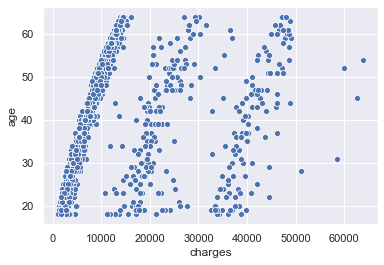

In [351]:
sns.scatterplot(x='charges',y='age',data= df_train)

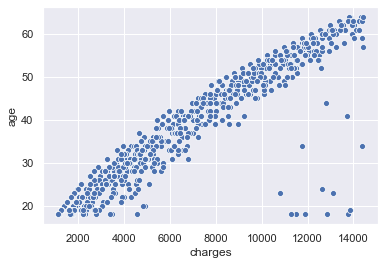

In [352]:
sns.scatterplot(x='charges',y='age',data= df1)


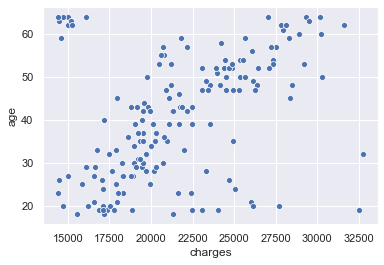

In [353]:
sns.scatterplot(x='charges',y='age',data= df2)


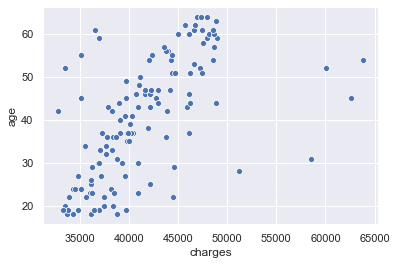

In [354]:
sns.scatterplot(x='charges',y='age',data= df3)


In [355]:
# train classification model
from imblearn.over_sampling import SMOTE, ADASYN
X = df_train.drop(['chargesCat','charges'], axis=1)
y = df_train['chargesCat']

X_resampled, y_resampled = SMOTE().fit_resample(X, y)


# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)


from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_scaled, y_resampled)

RandomForestClassifier()

Classification model ready with scaler and clf_rf

In [356]:
# Set feature and label columns
X = df1.drop(['charges','chargesCat'], axis=1)
y = df1['charges']

# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler_reg1 = StandardScaler()
X_train_scaled = scaler_reg1.fit_transform(X)


# Create and Train model
from sklearn.linear_model import LinearRegression
reg_df1 = LinearRegression().fit(X_train_scaled, y)

In [357]:
# Set feature and label columns
X = df2.drop(['charges','chargesCat'], axis=1)
y = df2['charges']

# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler_reg2 = StandardScaler()
X_train_scaled = scaler_reg2.fit_transform(X)


# Create and Train model
from sklearn.linear_model import LinearRegression
reg_df2 = LinearRegression().fit(X_train_scaled, y)

In [358]:
# Set feature and label columns
X = df3.drop(['charges','chargesCat'], axis=1)
y = df3['charges']

# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler_reg3 = StandardScaler()
X_train_scaled = scaler_reg3.fit_transform(X)


# Create and Train model
from sklearn.linear_model import LinearRegression
reg_df3 = LinearRegression().fit(X_train_scaled, y)

Now three regression models and scalers are ready

In [361]:
# predict charges category first
X = df_test.drop(['charges','chargesCat'], axis=1)
X_test_scaled = scaler.transform(X)
y_test_chargesCat_pred = clf_rf.predict(X_test_scaled)

In [362]:
result = df_test.copy()
result['chargesCat_pred'] = y_test_chargesCat_pred

In [365]:
# q1 = df['charges'].quantile(0.72)
# q2 = df['charges'].quantile(0.88)
# df['chargesCat'] = df['charges'].apply(lambda x: 0 if x <= q1 else (1 if x <= q2 else 2))
df_test1 = result[result['chargesCat_pred'] == 0].drop('chargesCat_pred',axis=1)
df_test2 = result[result['chargesCat_pred'] == 1].drop('chargesCat_pred',axis=1)
df_test3 = result[result['chargesCat_pred'] == 2].drop('chargesCat_pred',axis=1)

In [367]:
X = df_test1.drop(['charges','chargesCat'], axis=1)
X_test_scaled = scaler_reg1.transform(X)
y_test_charges_pred = reg_df1.predict(X_test_scaled)
result1 = df_test1.copy()
result1['charges_pred'] = y_test_charges_pred


In [368]:
X = df_test2.drop(['charges','chargesCat'], axis=1)
X_test_scaled = scaler_reg2.transform(X)
y_test_charges_pred = reg_df2.predict(X_test_scaled)
result2 = df_test2.copy()
result2['charges_pred'] = y_test_charges_pred


In [369]:
X = df_test3.drop(['charges','chargesCat'], axis=1)
X_test_scaled = scaler_reg3.transform(X)
y_test_charges_pred = reg_df3.predict(X_test_scaled)
result3 = df_test3.copy()
result3['charges_pred'] = y_test_charges_pred


In [375]:
df_test_pred = pd.concat([result1[['charges','charges_pred']],result2[['charges','charges_pred']],result3[['charges','charges_pred']]])
df_test_pred

,charges,charges_pred
1305,2464.61880,2748.020815
2,4449.46200,4544.516882
1248,1633.96180,1197.265881
169,4827.90495,4856.090703
121,1705.62450,1331.631769
...,...,...
251,47305.30500,46860.794139
1146,52590.82939,45379.972153
82,37165.16380,37482.696875
759,36307.79830,36464.260139


In [376]:
print_metrics(df_test_pred['charges'], df_test_pred['charges_pred'],7)

Mean Square Error = 42197773.69922159
Root Mean Square Error = 6495.98134997489
Mean Absolute Error = 3356.7268461677304
Median Absolute Error = 660.1738782963967
R^2 = 0.672253931322756
Adjusted R^2 = 0.6647195389393711


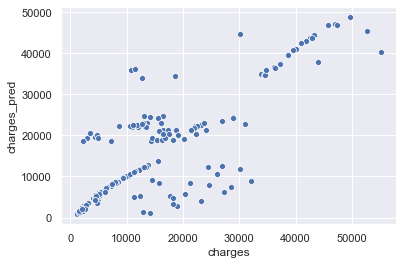

In [381]:
sns.scatterplot(x = df_test_pred['charges'], y=df_test_pred['charges_pred'])

Test use the regression model on the whole dataset

Mean Square Error = 38897967.100403346
Root Mean Square Error = 6236.823478374496
Mean Absolute Error = 4212.806643941273
Median Absolute Error = 2524.842569559817
R^2 = 0.7127332563870343
Adjusted R^2 = 0.7061294232005294


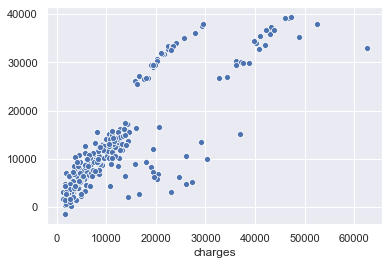

In [383]:
cat_cols = ['smoker', 'region']
num_cols = ['age','bmi','children']
label_col =['charges']

d_selected = df[cat_cols+num_cols+label_col]
d_features_dummies = pd.get_dummies(d_selected, columns=cat_cols, drop_first=True)

# Set feature and label columns
X = d_features_dummies.drop('charges', axis=1)
y = d_features_dummies['charges']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and Train model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train_scaled, y_train)

predictions = reg.predict(X_test_scaled)

print_metrics(y_test, predictions,7)
sns.scatterplot(x=y_test, y=predictions)


Comparing the overall prediction performance with the classification+regression model with a single regression model, the results are similiar. But a single regression model has slightly better results. But from the prediction vs. test scatter plot, it is clear that the classification+regression models performs better in large charges prediction. The diagonal distribution indicates good prediciton power. However, there are outliners in each region that affect the overall prediction performance. In furture study, can consider to refine the classification model and deal with the outliners in each region.